#Giorgio Mendoza
#CS539-F23-F02
#Dr. J. Sethi

# LAB 2-2: EDA with Multiple Datasets


## Overview

Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis.


### The Dataset

The dataset that we'll use can be found at: https://archive.ics.uci.edu/ml/datasets/Abalone

This dataset consists of various attributes of Abalone specimens, in particular the number of "rings" (last column) that shows the approximate age of the specimen. The dataset is typically used to predict number of rings from other attributes.

The data directory contains these files:

* **abalone.data**, A csv file with data on a number of abalone specimens.
* **abalone.names**, A text file with background information on the dataset.

Create an `abalone` directory on your Google CoLab and upload this data into it.

### Deliverables

Complete all the exercises below in this notebook and add a write up to this `.ipynb` file, as well. The write up should include your code, answers to exercise questions, and plots of results. The submission will be this file (after your edits) as an attachment, as described at the end of this notebook.

Don't forget to include answers to questions that ask for natural language responses, i.e., in English, not code!

We would prefer to test some of your code automatically, so please try to submit a notebook that uses the function names requested by the questions and that can be executed with "Cell > Run all".

### Guidelines

#### Code

This assignment can be done with basic Python and matplotlib. Feel free to use Pandas, too, which you may find well suited to several exercises. In general, we want you to use whatever is comfortable, except for libraries that include functionality covered in the assignment.

You're not required to do your coding in IPython, so feel free to use your favorite editor or IDE. But when you're done, remember to put your code into a notebook for your write up.

#### Collaboration

This assignment is to be done individually.  Everyone should be getting a hands on experience in this course.  You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Part 0: Reading

### Exercise 0

Step 0 is to read the dataset. First download it from the link above, and save it into a data directory such as the path in the cell below. Look at the first few lines of the file. Notice that most columns are numeric, but the first collumn is string with one of three values (gender).

Now construct two versions of the data table. First produce a variable 'abalone_raw' which is a list of records, and each record should be a list of strings. Now construct the variable 'abalone' which is list of list of numbers from it by parsing the numeric strings to float values. For the first column, map the string values to numeric ones and create a dictionary and inverse dictionary to map between the string values and numeric values.

In [2]:
import pandas as pd
import csv
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/"

#load data from a file
def loaddatafile(fname):
    try:
        with open(fname, 'r') as file:
            data = list(csv.reader(file))
        return data
    except FileNotFoundError:
        print(f"File not found at {fname}")
        return None
    except Exception as e:
        print(f"An error occurred while reading the file: {str(e)}")
        return None

# convert string table to a numeric one and return dicts
def rawtodata(table):
    if table is None:
        return None, None, None

    #define dictionaries for mapping between string & numeric values
    gender_dict = {'M': 0, 'F': 1, 'I': 2}
    inverse_gender_dict = {0: 'M', 1: 'F', 2: 'I'}

    abalone_numeric = []
    gender_column = []

    #process each row in input table
    for row in table:
        if len(row) != 9:
            print(f"Invalid row with {len(row)} columns: {row}")
            continue  #skip this row and continue with next one

        # map first column (gender) to numeric values using dictionary
        gender_numeric = gender_dict.get(row[0], -1)  # default to -1 if not found

        if gender_numeric == -1:
            print(f"Invalid gender value: {row[0]}")
            continue

        # Convert the rest of the columns to float values
        try:
            numeric_values = [float(val) for val in row[1:]]
        except ValueError as e:
            print(f"Error converting values to float: {str(e)}")
            continue

        # append numeric gender value and numeric value to result lists
        gender_column.append(gender_numeric)
        abalone_numeric.append([gender_numeric] + numeric_values)

    return abalone_numeric, gender_dict, inverse_gender_dict

abalone_raw = loaddatafile(DATA_PATH + "abalone.data")

if abalone_raw:
    abalone, adict, alkup = rawtodata(abalone_raw)
    if adict:
        print(adict)  # check string -> number map for first column

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'M': 0, 'F': 1, 'I': 2}


As you process the abalone dataset, the ``adict`` should be a dictionary (e.g., ``{'M': 0, 'F': 1, 'I': 2}``) and ``alkup`` should be the corresponding lookup list (e.g.,`` ['M', 'F', 'I']``) and, of course, ``abalone`` should be someting like this ``[[0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15.0],...]`` after you convert the string table to a numeric one.

## Part 1: Basic Statistics

Create a list of the column names for this dataset from the Dataset description. Preserve the case and the spaces in these names:

In [3]:
#from abalone.names file
colnames = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
]

:Now create a dictionary `coldict` mapping column name to column, and use this to define a `getcol` function which returns a named column from the abalone table.

In [6]:
import pandas as pd

abalone_df = pd.DataFrame(abalone, columns=colnames)

# creat a dictionary mapping column name to column
coldict = {col: abalone_df[col] for col in abalone_df.columns}

# function to get a named column from abalone table
def getcol(colname):
    if colname in coldict:
        return coldict[colname]
    else:
        return None

# get data for "Height" column
height_column = getcol("Height")

if height_column is not None:
    height_min = height_column.min()
    height_max = height_column.max()
    height_mean = height_column.mean()
    height_std = height_column.std()

    print(f"Minimum Height: {height_min}")
    print(f"Maximum Height: {height_max}")
    print(f"Average Height: {height_mean}")
    print(f"Standard Deviation of Height: {height_std}")
else:
    print("Column 'Height' not found in the DataFrame.")

Minimum Height: 0.0
Maximum Height: 1.13
Average Height: 0.13951639932966242
Standard Deviation of Height: 0.041827056607257274


> TODO: What is the min, max, average and std deviation of the Height column?

#Answer:

Minimum Height: 0.0

Maximum Height: 1.13

Average Height: 0.13951639932966242

Standard Deviation of Height: 0.041827056607257274


> TODO: Now create a 9 x 5 table. Each row of the table should be a column name followed by the values of min, max, mean and std for that column.

In [11]:
import pandas as pd

abalone_df = pd.DataFrame(abalone, columns=colnames)

# init empty dataframe for summary table
summary_table = pd.DataFrame(columns=["Column Name", "Min", "Max", "Mean", "Std Dev"])

# iterating each column in dataframe
for col in abalone_df.columns:
    if col == "Sex":
        continue
    column_data = abalone_df[col]
    min_val = column_data.min()
    max_val = column_data.max()
    mean_val = column_data.mean()
    std_dev = column_data.std()

    # append summary values to summary table
    summary_table = pd.concat([summary_table, pd.DataFrame({"Column Name": [col], "Min": [min_val], "Max": [max_val], "Mean": [mean_val], "Std Dev": [std_dev]})], ignore_index=True)

print(summary_table)

      Column Name     Min      Max      Mean   Std Dev
0          Length  0.0750   0.8150  0.523992  0.120093
1        Diameter  0.0550   0.6500  0.407881  0.099240
2          Height  0.0000   1.1300  0.139516  0.041827
3    Whole weight  0.0020   2.8255  0.828742  0.490389
4  Shucked weight  0.0010   1.4880  0.359367  0.221963
5  Viscera weight  0.0005   0.7600  0.180594  0.109614
6    Shell weight  0.0015   1.0050  0.238831  0.139203
7           Rings  1.0000  29.0000  9.933684  3.224169


> TODO: List anything interesting about these values (this is an open-ended question)

#Answer:

The length value is interesting since the min and max values vary by a lot.
The other measurements besides length, such as diameter and height give us a better image of the physical characteristics of these abalones.
It's also interesting that abalones are also measured in "Shucked weight," and "Viscera weight" besides "Whole weight".
It's also interesting that the rings column might be related to the age of the abalons similar as in trees' rings which also tells longevity

## Part 2: Histograms

> TODO: Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use pylab, and its 'subplots' function. Include the column name as a title above each subfigure. Try to use loops rather than enumerating all 9 column names.

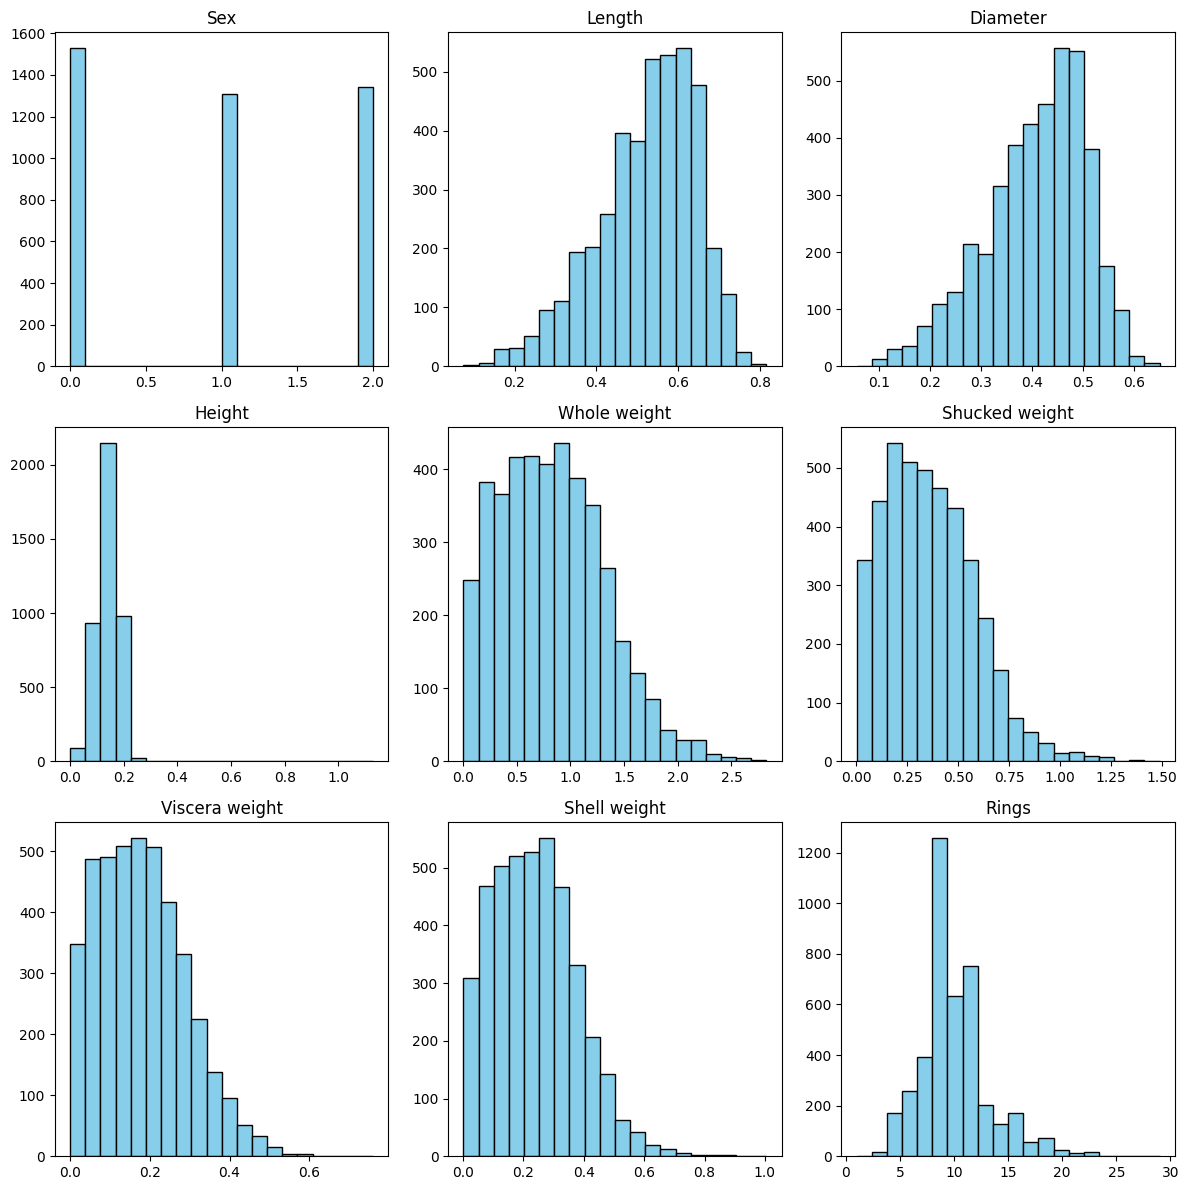

In [103]:
import pylab
import pandas as pd

abalone_df = pd.DataFrame(abalone, columns=colnames)

# Create 3x3 grid of histograms
pylab.figure(figsize=(12, 12))

for i, col in enumerate(colnames):
    pylab.subplot(3, 3, i + 1)
    pylab.hist(abalone_df[col], bins=20, color='skyblue', edgecolor='black')
    pylab.title(col)

pylab.tight_layout()
pylab.show()

> TODO: Which of the column data are skewed and in which direction?

#Answer:

The plots for Whole Weight, Shucked Weight, Viscera Weight and Shell weight are mostly skewered to the left.
The plots for lenght and diameter are skewered to the right.
## Part 3: Scatter plots

> TODO: Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot.

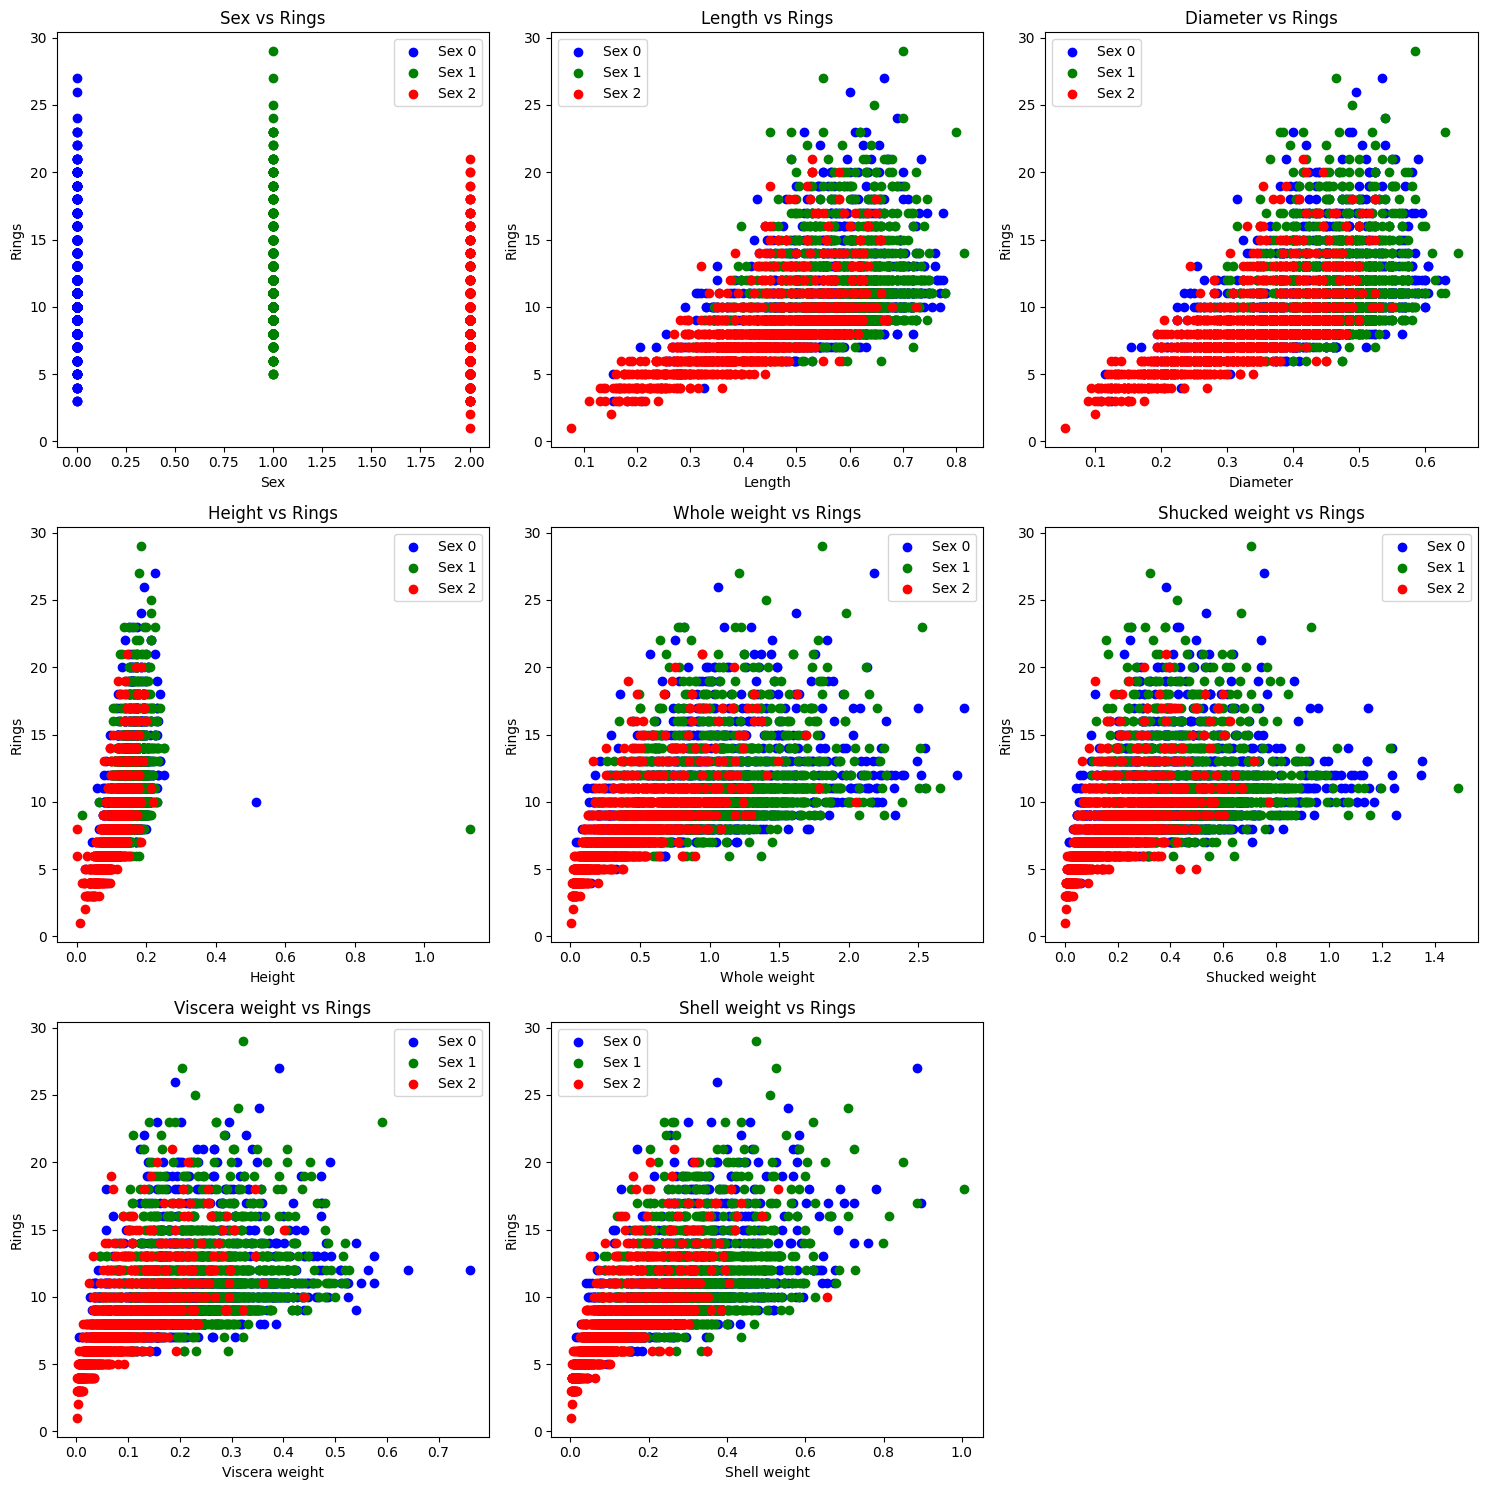

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab

abalone_df = pd.DataFrame(abalone, columns=colnames)

# Create a 3x3 grid of scatter plots for each column vs "Rings"
plt.figure(figsize=(15, 15))

for i, col in enumerate(colnames[:-1]):
    pylab.subplot(3, 3, i + 1)

    # verify column exists in dataframe
    if col in abalone_df.columns:
        # filter out rows with NaN values in current column
        valid_data = abalone_df[~abalone_df[col].isna()]

        # Check if there is any data left after filtering
        if not valid_data.empty:
            # scatter plot for current column vs. "Rings," using different colors for each gender
            colors = ['b', 'g', 'r']
            for sex_value, color in zip(valid_data['Sex'].unique(), colors):
                subset = valid_data[valid_data['Sex'] == sex_value]
                pylab.scatter(subset[col], subset['Rings'], label=f'Sex {sex_value}', color=color)

            pylab.title(f'{col} vs Rings')
            pylab.xlabel(col)
            pylab.ylabel('Rings')
            pylab.legend()
        else:
            print(f"No valid data for column {col}.")
    else:
        print(f"Column {col} not found in the DataFrame.")

pylab.tight_layout()
pylab.show()

> TODO: Do you notice any issues with the dataset? e.g. outliers?

#Answer:

Yes, there are some outliers, especially in the Height vs Rings plot. It could mean that maybe there were some errors in data collection or maybe were very rare abalons specimens.

## Part 4: Regression lines

Add regression lines to the scatter plots above.

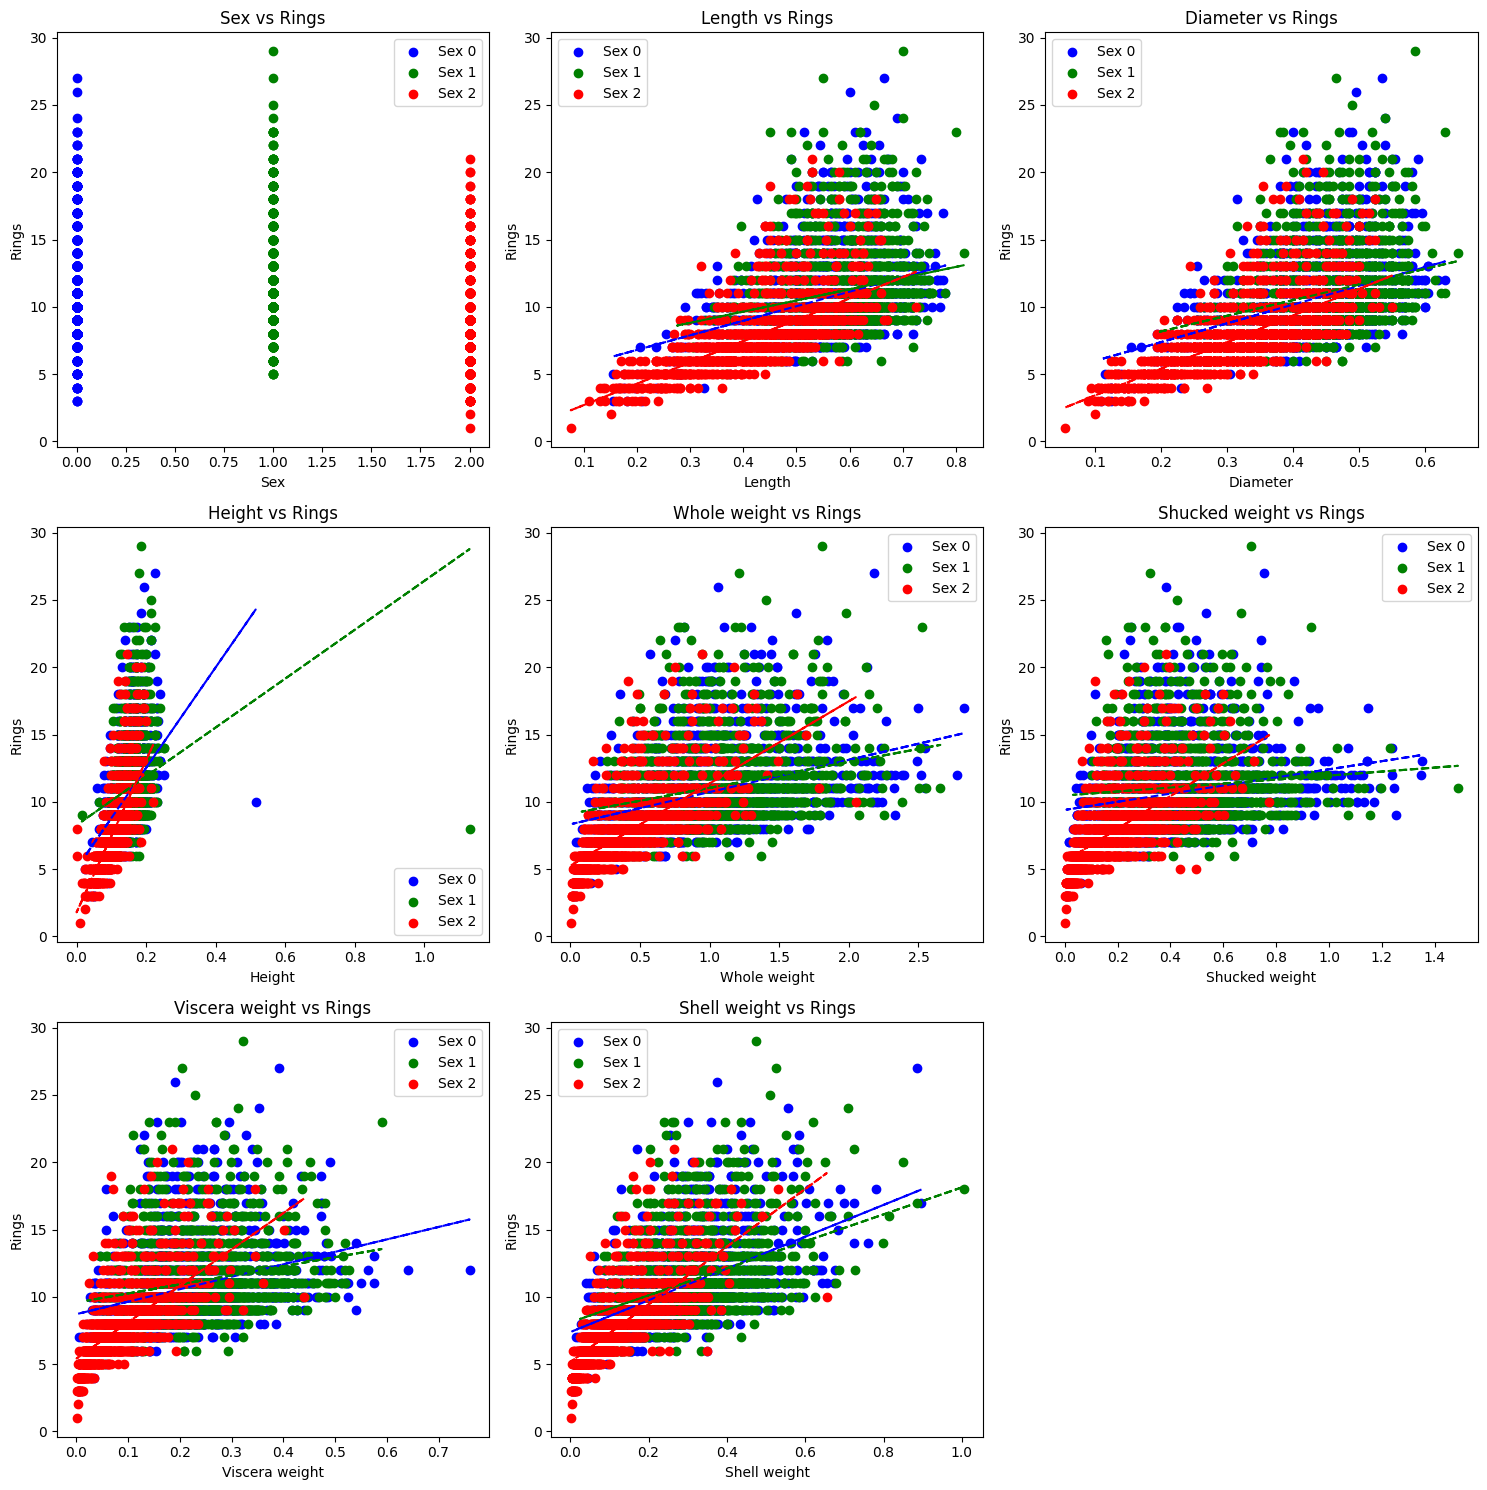

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import numpy as np

abalone_df = pd.DataFrame(abalone, columns=colnames)

# 3x3 grid of scatter plots for each column vs "Rings"
plt.figure(figsize=(15, 15))

for i, col in enumerate(colnames[:-1]):
    pylab.subplot(3, 3, i + 1)

    # verify column exists in dataframe
    if col in abalone_df.columns:
        # filter out rows with NaN values in current column
        valid_data = abalone_df[~abalone_df[col].isna()]

        # check if there is any data left after filtering
        if not valid_data.empty:
            # scatter plot for current column vs. "Rings"
            colors = ['b', 'g', 'r']
            for sex_value, color in zip(valid_data['Sex'].unique(), colors):
                subset = valid_data[valid_data['Sex'] == sex_value]
                plt.scatter(subset[col], subset['Rings'], label=f'Sex {sex_value}', color=color)

                # simple linear regression
                x = subset[col]
                y = subset['Rings']
                A = np.vstack([x, np.ones(len(x))]).T
                m, c = np.linalg.lstsq(A, y, rcond=None)[0]

                # plot regression line
                plt.plot(x, m * x + c, color=color, linestyle='--')

            pylab.title(f'{col} vs Rings')
            pylab.xlabel(col)
            pylab.ylabel('Rings')
            pylab.legend()
        else:
            print(f"No valid data for column {col}.")
    else:
        print(f"Column {col} not found in the DataFrame.")

pylab.show()

## Part 5: Prediction Error

> TODO: Next we would like to explore prediction, and find the feature that gives the best (lowest error) predictions of number of rings. You can do this with polyfit, once again predicting the Rings feature from one of the others, by adding an option to return the "residual" of the fit, which is a measure of its prediction error. Read the documentation for polyfit on how to do this. Then make a 3 x 3 array of residuals.

In [33]:
import numpy as np
import pandas as pd

abalone_df = pd.DataFrame(abalone, columns=colnames)

# 3x3 matrix to store residuals
residuals = np.zeros((3, 3), dtype=object)

# iterating each combination of first three columns
for i, col1 in enumerate(colnames[:3]):
    for j, col2 in enumerate(colnames[:3]):
        if i <= j:
            if col1 in abalone_df.columns and col2 in abalone_df.columns:
                # filter out rows with NaN values in the selected columns
                valid_data = abalone_df[~abalone_df[[col1, col2]].isna().any(axis=1)]

                # check if there is any data left after filtering
                if not valid_data.empty:
                    #linear regression model
                    x = valid_data[col1]
                    y = valid_data[col2]
                    A = np.vstack([x, np.ones(len(x))]).T
                    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

                    # get residuals
                    residuals[i, j] = (y - (m * x + c)).values
                    residuals[j, i] = residuals[i, j]  #corresponding elements in lower triangle

print("Residuals:")
print(residuals)
print("Size of residuals array:", residuals.shape)



Residuals:
[[array([2.27228229e-16, 2.27228229e-16, 4.88498131e-15, ...,
         2.27228229e-16, 4.88498131e-15, 2.27228229e-16])
  array([-0.13119645, -0.23619645,  0.00890693, ...,  0.01380355,
          0.10390693,  0.12380355])
  array([-0.09537024, -0.19537024,  0.01456499, ...,  0.01462976,
          0.07956499,  0.09462976])                              ]
 [array([-0.13119645, -0.23619645,  0.00890693, ...,  0.01380355,
          0.10390693,  0.12380355])
  array([2.22044605e-16, 2.22044605e-16, 3.33066907e-16, ...,
         3.33066907e-16, 3.33066907e-16, 3.33066907e-16])
  array([ 0.01337909, -0.00099754,  0.00721954, ...,  0.00513729,
         -0.00524923, -0.00456339])                              ]
 [array([-0.09537024, -0.19537024,  0.01456499, ...,  0.01462976,
          0.07956499,  0.09462976])
  array([ 0.01337909, -0.00099754,  0.00721954, ...,  0.00513729,
         -0.00524923, -0.00456339])
  array([1.11022302e-16, 5.55111512e-17, 1.11022302e-16, ...,
         1.66

> TODO: What feature gives the smallest residual (other than Rings of course)?

#Answer:

It appears that the smallest value is approximately 0.0160623405, which corresponds to the RMS when "Viscera weight" (the third feature in dataset) is used for prediction.

The residuals are sums of the squared error for all the predictions. A more useful measure is the RMS (root-mean-squared) distance for each point. This is an estimate of how far the actual rings count for a specimen is from its prediction. From the residuals above, compute the RMS value for each residual.

In [35]:
import numpy as np
import pandas as pd

abalone_df = pd.DataFrame(abalone, columns=colnames)
residuals = np.zeros((3, 3), dtype=object)
rms_values = np.zeros((3, 3), dtype=float)

# iterating through each combination of first three columns
for i, col1 in enumerate(colnames[:3]):
    for j, col2 in enumerate(colnames[:3]):
        if i <= j:
            if col1 in abalone_df.columns and col2 in abalone_df.columns:
                valid_data = abalone_df[~abalone_df[[col1, col2]].isna().any(axis=1)]

                # check if there is any data left after filtering
                if not valid_data.empty:
                    # linear regression model
                    x = valid_data[col1]
                    y = valid_data[col2]
                    A = np.vstack([x, np.ones(len(x))]).T
                    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

                    # get residuals
                    residuals[i, j] = (y - (m * x + c)).values
                    residuals[j, i] = residuals[i, j]

                    # get RMS value
                    rms_value = np.sqrt(np.mean(np.square(residuals[i, j])))
                    rms_values[i, j] = rms_value
                    rms_values[j, i] = rms_value  # corresponding elements in lower triangle


#3x3 matrix of RMS values
print("RMS Values:")
print(rms_values)

RMS Values:
[[6.06422189e-15 1.07308143e-01 8.81964000e-02]
 [1.07308143e-01 2.95725450e-16 1.60623405e-02]
 [8.81964000e-02 1.60623405e-02 1.22524527e-16]]


## Part 6: Significance

So far we have studied prediction without worrying about chance. The linear regression coefficient between any two data sequences of the same size will normally be non-zero due to noise. This suggests that one sequence "predicts" the other. e.g. pick a random woman and man from a room, then their ages are almost surely different. The age and gender attributes predict each other perfectly on this sample, but the direction of influence is completely arbitrary! Obviously this doesnt generalize.

Statistical tests measure the likelihood that an observation may be due to chance if there is no "real" influence between two variables. The probability of the observations due to chance when there is no influence is called a p-value. You want this probability to be small, say less than 0.01.

> TODO: Use the `lingress` function from scipy.stats to perform linear fits between each data column and the rings column. Save the pvalues it returns for each fit into a 3 x 3 array.

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

abalone_df = pd.DataFrame(abalone, columns=colnames)
p_values = np.zeros((3, 3), dtype=float)

for i, col1 in enumerate(colnames[:3]):
    for j, col2 in enumerate(colnames[:3]):
        if i <= j:
            if col1 in abalone_df.columns and col2 in abalone_df.columns:
                valid_data = abalone_df[~abalone_df[[col1, col2]].isna().any(axis=1)]

                # check if there is any data left after filtering
                if not valid_data.empty:
                    # linear regression and get the p-value
                    result = linregress(valid_data[col1], valid_data[col2])
                    p_value = result.pvalue

                    # store p-value in the 3x3 matrix
                    p_values[i, j] = p_value
                    p_values[j, i] = p_value

# 3x3 matrix of p-values
print("P-Values:")
print(p_values)

P-Values:
[[0.00000000e+000 3.65260832e-206 5.49215774e-216]
 [3.65260832e-206 0.00000000e+000 0.00000000e+000]
 [5.49215774e-216 0.00000000e+000 0.00000000e+000]]


> TODO: Are all the p-values less than 0.01 ?

Even though this is a different application, the website Investopedia indicates that "the smaller the p-value, the greater the evidence against the null hypothesis; the p-value is 0.001, there is strong evidence against the null hypothesis." Since we have various p-values less tan 0.01 then it means that there is likely a significant linear relationship between the variables studied.

# Intermediate: EDA: Practice with a New Dataset

Now let's repeat this for a brand new dataset. We'll again use the UC Irvine machine learning data repository to get the Heart Diseas dataset. Find the datasset at the following URL https://archive.ics.uci.edu/ml/datasets/Heart+Disease  and read the dataset description.


Click on the "Data Folder" link near the top of the page. If you're not inside your VM, copy the URL for this page and then paste it into a browser on your VM.

Now click on `processed.cleveland.data` and save it into a `~/labs/lab2` directory.

Now read the data into Python and create a variable `cleveland_raw_data` which is a list of rows from this dataset. Each row should be a list of string values returned by the csv file reader.

In [38]:
import pandas as pd
import csv

from google.colab import drive
drive.mount('/content/drive')
labdir = "/content/drive/MyDrive/Colab Notebooks/"

with open(labdir+"processed.cleveland.data") as csvfile:
    cleveland_raw_data = list(csv.reader(csvfile))
num_rows = len(cleveland_raw_data)

# Print number of rows
print("Number of Rows:", num_rows)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of Rows: 303


> TODO: How many rows are there in the dataset?
#Answer:

There are 303 rows in the processed.cleveland.data dataset file.

## Data Cleaning

First we have to clean and sanitize the data. This data is pretty clean and is mostly numeric but contains some `?` in some fields.  To make it easier to handle, we convert those fields to `None`. For convenience, you should define a function "safefloat" that takes a string argument, and returns None if the argument is `?`, otherwise the float value of the string.

In [39]:
import string
def safefloat(x):
    if x == "?":  # check if input is "?"
        return None
    try:
        return float(x)  # convert input to a float
    except ValueError:
        return None

cleaned_data = [[safefloat(x) for x in row] for row in cleveland_raw_data]

As discussed in the dataset summary, the following are the column names.

In [7]:
headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Now we construct a dictionary mapping these header names to the column numbers 0...13:

In [15]:
headernum = dict(zip(headers, range(len(headers))))

Define a function "getcol" that takes a column name and returns the data in that column as a list of numbers.

In [27]:
def getcol(name): # TODO write getcol
    # verify if given column name exists in headernum dictionary
    if name in headernum:
        # Get index of the column using headernum dictionary
        col_index = headernum[name]

        # get column data from cleveland_data list
        column_data = [row[col_index] for row in cleaned_data]

        # convert column data to a list of numbers (floats)
        column_data = [safefloat(value) for value in column_data]

        return column_data
    else:
        return None  # if column name is not found in headernum, return None
age_column = getcol('age')
print("Age Column:", age_column)


Age Column: [63.0, 67.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 63.0, 53.0, 57.0, 56.0, 56.0, 44.0, 52.0, 57.0, 48.0, 54.0, 48.0, 49.0, 64.0, 58.0, 58.0, 58.0, 60.0, 50.0, 58.0, 66.0, 43.0, 40.0, 69.0, 60.0, 64.0, 59.0, 44.0, 42.0, 43.0, 57.0, 55.0, 61.0, 65.0, 40.0, 71.0, 59.0, 61.0, 58.0, 51.0, 50.0, 65.0, 53.0, 41.0, 65.0, 44.0, 44.0, 60.0, 54.0, 50.0, 41.0, 54.0, 51.0, 51.0, 46.0, 58.0, 54.0, 54.0, 60.0, 60.0, 54.0, 59.0, 46.0, 65.0, 67.0, 62.0, 65.0, 44.0, 65.0, 60.0, 51.0, 48.0, 58.0, 45.0, 53.0, 39.0, 68.0, 52.0, 44.0, 47.0, 53.0, 53.0, 51.0, 66.0, 62.0, 62.0, 44.0, 63.0, 52.0, 59.0, 60.0, 52.0, 48.0, 45.0, 34.0, 57.0, 71.0, 49.0, 54.0, 59.0, 57.0, 61.0, 39.0, 61.0, 56.0, 52.0, 43.0, 62.0, 41.0, 58.0, 35.0, 63.0, 65.0, 48.0, 63.0, 51.0, 55.0, 65.0, 45.0, 56.0, 54.0, 44.0, 62.0, 54.0, 51.0, 29.0, 51.0, 43.0, 55.0, 70.0, 62.0, 35.0, 51.0, 59.0, 59.0, 52.0, 64.0, 58.0, 47.0, 57.0, 41.0, 45.0, 60.0, 52.0, 42.0, 67.0, 55.0, 64.0, 70.0, 51.0, 58.0, 60.0, 68.0, 46.0, 77.0, 54.0, 58.0, 48.

## Basic Statistics

What is the minimum, maximum, mean and standard deviation of the age of this set of subjects? Use the numpy package with contains the `mean()` and `std()` functions.

In [28]:
import numpy as np
age = getcol('age')
[min(age), max(age), np.mean(age), np.std(age)]

[29.0, 77.0, 54.43894389438944, 9.02373483119838]

Next, we define a function select which given a column name and a predicate, returns the values of that column at rows for which the predicate is true.

In [36]:
def select(colname, predicate):
    icol = headernum[colname]
    return [i[icol] for i in cleaned_data if predicate(i)]

Now run these expressions to get the mean age of male and female subjects.

In [39]:
def fieldis(colname, cval):
    icol = headernum[colname]
    return lambda x: x[icol] == cval

# Calculate mean age for male and female subjects
mean_age_male = np.mean(select('age', fieldis('sex', 1)))
mean_age_female = np.mean(select('age', fieldis('sex', 0)))

print("Mean Age of Male Subjects:", mean_age_male)
print("Mean Age of Female Subjects:", mean_age_female)


Mean Age of Male Subjects: 53.83495145631068
Mean Age of Female Subjects: 55.72164948453608


> TODO: What were the mean ages for females and males?

#Answer:

After running the mean functions, the mean age of male subjects is 53.83495145631068 while the mean age of female subjects is 55.72164948453608



## Histograms of Data Fields

Plot histograms of age and resting blood pressure

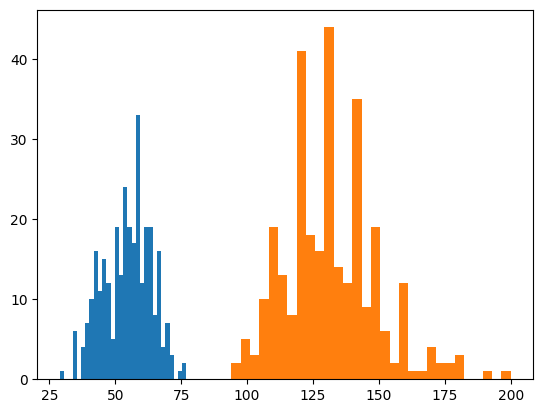

In [40]:
import pylab
%matplotlib inline

h1 = pylab.hist(age, 30)

bp = getcol('trestbps')
h2 = pylab.hist(bp, 30)

> TODO Describe the rough shape of the distribution of the bps, `bp`. Is it skewed?

#Answer:

For these plots, the distribution doesn't seem skewered. Instead, it roughly looks like a bell-shaped or normal distribution with a peak in the center and tails that extends outwards on both directions.

## Scatter Plots

Make scatter plots of:
*    age vs bp (resting blood pressure)
*    age vs thalach (max heart rate)

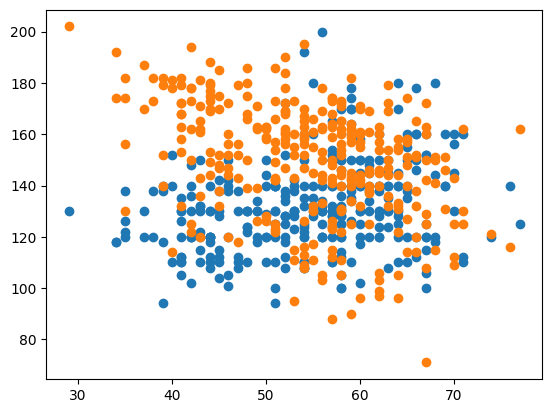

In [41]:
pylab.scatter(age, bp)

maxhr = getcol('thalach')
pylab.scatter(age, maxhr)

We can augment the basic scatter plots with other information that might be relevant. In the plot below, we used the `num` field to color the dots. `num` is an integer indicating the degree of heart disease from `0...4`. We also make the dots larger with the `s=` argument to make the colors easier to see.

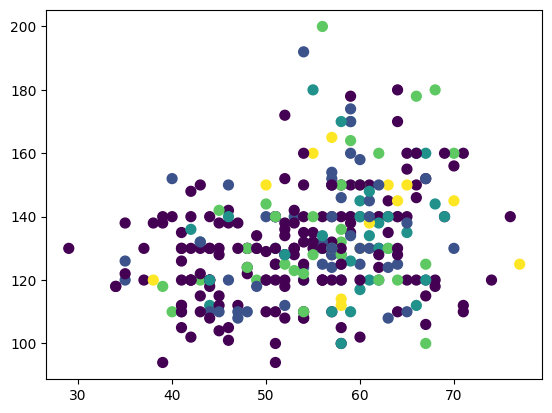

In [42]:
pylab.scatter(age, bp, c=getcol('num'), s=50)

To figure out what color encodes what value, we can do a simple plot of the values `0...4`

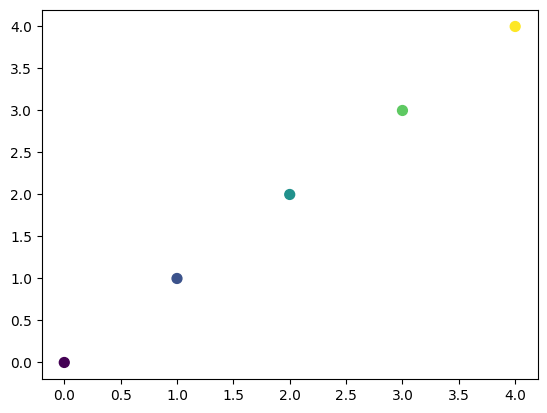

In [43]:
pylab.scatter(range(5), range(5), c=range(5), s=50)

> TODO: What do you notice about the distribution of num = 2 diagnoses?

#Answer:

In the scatter plots, I observed that the 'num = 2' diagnoses are represented by the green dots, primarily clustered around the coordinates (2, 2) in the third plot. When I apply a similar approach to the second plot, it becomes apparent that most 'num = 2' data points are concentrated in the central region. This suggests that individuals with 'num = 2' diagnoses typically fall within the age range of approximately 42 to 67 years and have a resting blood pressure (bps) that ranges from at least 100 bps to around 180 bps. The majority of data points for 'num = 2' lie within this bps range, indicating a significant concentration of diagnoses in this specific age and bps range.

These scatter plots seem to show trends. To make those clearer we can overlay regression lines. The regression line minimizes the total squared vertical distance from the line to the data points, and shows the general trend for the data.

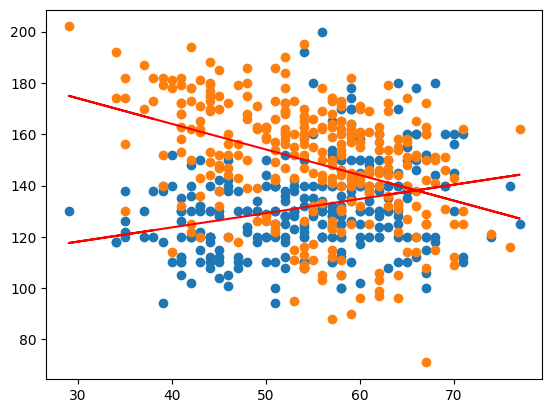

In [44]:
# for numpy we need arrays instead of lists of values
age = np.array(getcol('age'))
bp = np.array(getcol('trestbps'))

pylab.scatter(age, bp)
m, b = np.polyfit(age, bp, 1)
pylab.plot(age, m*age + b, '-', color='red')

maxhr = np.array(getcol('thalach'))

pylab.scatter(age, maxhr)
m, b = np.polyfit(age, maxhr, 1)
pylab.plot(age, m*age + b, '-', color='red')

## Critical Thinking with Data

The following scatter plot and regression line shows the relationship between blood pressure (X-axis) and heart disease (Y-axis).

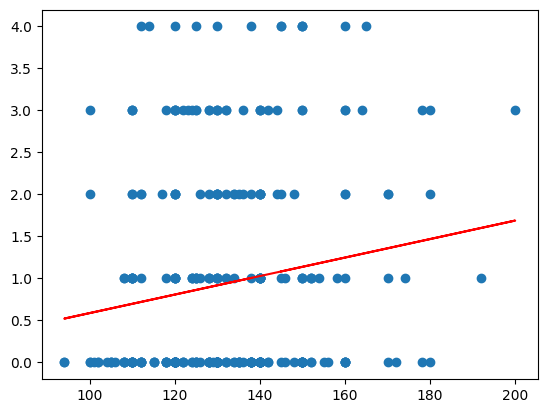

In [46]:
num = np.array(getcol('num'))
factor = bp

pylab.scatter(factor, num)
m, b = np.polyfit(factor, num, 1)
pylab.plot(factor, m*factor + b, '-', color='red')

#TODO:

Based on this plot, do you think blood pressure influences heart disease?

#Answer:

The positive slope of the linear regression line suggests a positive correlation between blood pressure and the diagnosis of heart disease ('num'). This means that as blood pressure increases, there is an indication that the likelihood of a higher 'num' value (more severe diagnosis) also increases.
It might also be important to highlight that the slope crosses the datapoints of 'num' = 1 around 'bp' = 135 which could suggest that this particular threshold of blood pressure may be significant in predicting a certain level of heart disease risk.




Now consider this plot of age versus num:

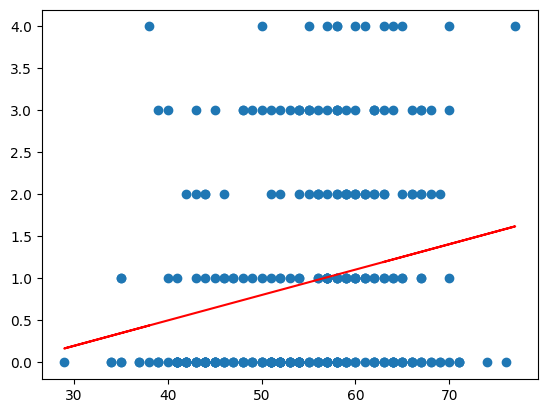

In [45]:
num = np.array(getcol('num'))
factor = age

pylab.scatter(factor, num)
m, b = np.polyfit(factor, num, 1)
pylab.plot(factor, m*factor + b, '-', color='red')

#TODO:
Based on this plot of Age vs Num and the previous plot of Age vs BPS, what would you say now about the relation between BPS and Num?

#Answer:

Similarly as in the previous plot, the datapoints are mainly located at num = 0, num = 1, num = 2, num = 3, and num = 4 indicates that different levels of heart disease severity are associated with different age groups.
The positive slope and the fact that the slope primarily crosses the datapoints at num = 1 suggest a positive correlation between age and heart disease.
This observation is also well-known in the medical field which indicates that age is a known risk factor for heart disease.

## Dimensionality Reduction

Recall that dimensionality reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the Principal Component Analysis (PCA) function for this purpose. You use it like this:

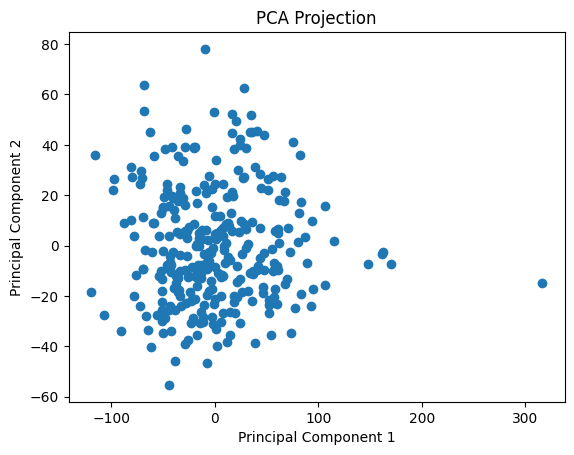

In [59]:
import numpy as np
from sklearn.decomposition import PCA
import pylab

cleaned_data_matrix = np.array(cleaned_data, dtype=np.float64)

# performing PCA on first 8 columns of data
pca = PCA(n_components=2)
yy = pca.fit_transform(cleaned_data_matrix[:, 0:8])

pylab.scatter(yy[:, 0], yy[:, 1])
pylab.xlabel('Principal Component 1')
pylab.ylabel('Principal Component 2')
pylab.title('PCA Projection')
pylab.show()

> TODO: Do you see a relationship between the two main variables (X and Y axes of this plot)?

#Answer:

It appears that there is a concentration of datapoints near the origin (0,0), indicating that the variables have a tendency to be close to zero, then they move away from the origin in both the x and y directions. The magnitude of the variables tends to increase.

This pattern suggests that there may be a correlation or relationship between the two variables, and that as one variable increases (or decreases), the other variable tends to increase (or decrease) as well. However, to reinforce this conclusion we might've to do additional analyses.

# Optional: Advanced: The NY Times Text Data

Download the NY times Dataset (https://archive.ics.uci.edu/ml/datasets/Bag+of+Words) from here https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/docword.nips.txt.gz and save it to your lab2 directory. Unzip the file, producing `docword.nips.txt`; this was used in papers published in the NIPS (Neural Information Processing Systems) computer science conference (later renamed as NeurIPS: https://nips.cc/).

This file has 3 header lines: num docs, num distinct words, num total words. The following lines represent the documents with three fields:

`docid wordid wordcount`

We can read the file with a csv reader:

In [ ]:
with open(labdir+"docword.nips.txt") as csvfile:
    ndocs = int(csvfile.readline())
    nwords = int(csvfile.readline())
    nnz = int(csvfile.readline())
    nips_raw_data = list(csv.reader(csvfile, delimiter=' '))

nips_data = [[int(x) for x in y] for y in nips_raw_data] # convert from string to numeric data

[ndocs, nwords, nnz]

Now we're going to create an array `counts` containing the counts for each word over all documents. Note that we use `row[1]-1` as the index. The docword files use 1-based array indexing, but Python uses zero-based indexing.

In [ ]:
counts = [0] * nwords
for row in nips_data:
    counts[row[1]-1] += row[2] # increment count for this word by the value in the third column

Next, we zip the word index as the first column, and sort this table by word count in descending order.

In [ ]:
import operator
wordtab = zip(range(nwords), counts)
wordtab.sort(key=lambda x: x[1], reverse=True)

The top (first) values in this list are the most frequent word ids (first column), and their counts (second column):

In [ ]:
wordtab[0:8]

Now grab the vocabulary file for nips: https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.nips.txt and save it to lab2. Run the following to load it and create a dictionary (word $\rightarrow$ wordid) and inverse dictionary (wordid $\rightarrow$ word) from it.

In [ ]:
mydict = {}            # word dictionary
words = [''] * nwords  # invese dictionary - just an array of strings
i = 0
with open(labdir+"vocab.nips.txt") as txtfile:
    for line in txtfile:
        word = line.rstrip('\n')
        mydict[word] = i
        words[i] = word
        i += 1

Now we can find the top words using the inverse dictionary:

In [ ]:
topwords = [words[x] for x,y in wordtab[0:10]]
topwords

> TODO: What do you think is the topic of the NIPS dataset?

Finally, we can plot the counts words in rank order (decreasing order of frequency).

In [ ]:
scounts = [y for x,y in wordtab]
pylab.plot(scounts)

What form does this curve have? To make it clearer, lets do a log-log plot.

In [ ]:
pylab.loglog(scounts)

> TODO: What is the approximate slope (in log-log space) of this curve over the frequency range $10^1$ to $10^3$ ?

## Responses

Please enter your responses in this notebook itself by creating new text or code cells, as needed.

# Submission Instructions

Once you have filled out the Colab notebook completely, you are ready to submit. Your final submission will consist of the `.ipynb` and the `.pdf` files, as described below:

1. Download the Google Colab notebook as an iPython notebook
   * You can do this by going to *File \> Download .ipynb*
2. Print out a PDF of your Colab notebook.
   * In Google Chrome, you can do this by going to *File \> Print* and then choosing *Save to PDF*.
   * **Make sure you have run all cells first.**
   * Ensure you've closed the table of contents sidebar before you print so we can easily see your work and output.
3. Submit **both** the `.ipynb` notebook and the `.pdf` files via Blackboard or directly via the cloud using the Google Integration with Blackboard (if applicable).

---